In [34]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [48]:
seg_file = "P1_L_3_seg.npy"
image_file = "P1_L_3.tif"
# dat = np.load(file, allow_pickle=True).item()

In [68]:
def ROI_mreasure(seg_file, image_file):
    """For a given cellpose segmentation in 3D, measure the ROI areas and insensity of pixels
    in each channel

    Args:
        seg_file (string): cellpose _seg.npy output
        image_file (string): tiff image segmented

    Returns:
        measurement: columns are ROI_id, ROI area, chan_1 intensity, chan_2 intensity....
        title: title for each ROI
    """
    # load maskfile
    segmentations = np.load(seg_file,allow_pickle=True).item()
    masks = segmentations["masks"]
    ROI_number = np.max(masks)
    
    # load image 
    image = tifffile.imread(image_file)
    channels = image.shape[1]
    
    # create numpy arry placeholder results
    measurement = np.zeros((ROI_number,channels+2)) # ROI_id, ROI area, chan_1 intensity, chan_2 intensity....
    
    ROI_count = 0
    for z_slice in range(image.shape[0]):
        ROIs = [roi for roi in np.unique(masks[z_slice]) if roi != 0]
        for roi in ROIs:
            roi_mask = masks[z_slice] == roi
            measurement[ROI_count,0] = roi # ROI id
            measurement[ROI_count,1] = np.sum(roi_mask) # ROI area, unit pixel
            for chan in range(channels):
                measurement[ROI_count,chan+2] = np.sum(image[z_slice,chan] * roi_mask) # sum of intensity
            ROI_count += 1
    
    title = ["ROI_ID","ROI_area"] + ["Chan_" + str(i) for i in range(channels)]
    
    return measurement, title
    

In [69]:
test, title = ROI_mreasure(seg_file, image_file)

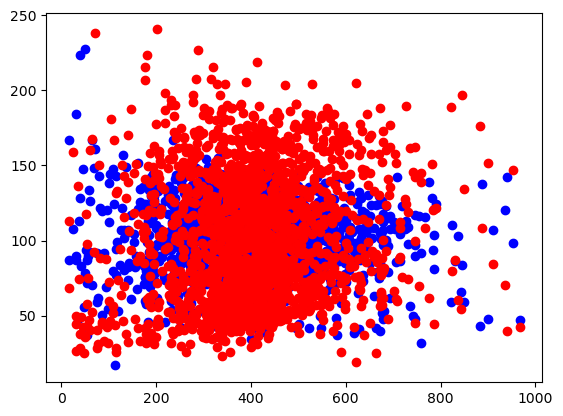

In [74]:
plt.figure()
plt.scatter(test[:,1],test[:,2]/test[:,1],color = "b")
plt.scatter(test[:,1],test[:,3]/test[:,1],color = "r")
plt.show()

In [49]:
# load maskfile
segmentations = np.load(seg_file,allow_pickle=True).item()
masks = segmentations["masks"]
ROI_number = np.max(masks)

# load image 
image = tifffile.imread(image_file)
channels = image.shape[1]

# create numpy arry placeholder results
measurement = np.zeros((ROI_number,channels+2)) # ROI_id, ROI area, chan_1 intensity, chan_2 intensity....

# ROI_count = 0
# for z_slice in range(image.shape[0]):
#     ROIs = [roi for roi in np.unique(masks[z_slice]) if roi != 0]
#     for roi in ROIs:
#         roi_mask = masks[z_slice] == roi
#         measurement[ROI_count,0] = roi # ROI id
#         measurement[ROI_count,1] = np.sum(roi_mask) # ROI area, unit pixel
#         for chan in range(channels):
#             measurement[ROI_count,chan] = image[z_slice,chan] * roi_mask # sum of intensity
#         ROI_count += 1

# title = ["ROI_ID","ROI_area"] + ["Chan_" + str(i) for i in range(channels)]

# segmentations.clear()
# image.clear() 

In [67]:
z_slice = 5
chan = 1
ROIs = [roi for roi in np.unique(masks[z_slice]) if roi != 0]
roi = ROIs[5]
roi_mask = masks[z_slice] == roi
np.sum(image[z_slice,chan] * roi_mask)

2950

In [51]:
ROIs

[1734,
 1735,
 1736,
 1737,
 1738,
 1739,
 1740,
 1741,
 1742,
 1743,
 1744,
 1745,
 1746,
 1747,
 1748,
 1749,
 1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1789,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802]

In [10]:
image = tifffile.imread("P1_L_3.tif")

In [11]:
image.shape
# shape = [z-slices, channel, x-dimention, y-dimention]

(10, 2, 759, 786)

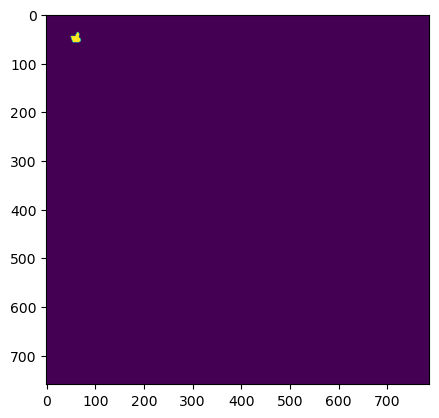

In [18]:
plt.imshow(dat["masks"][5]==1735)

In [17]:

np.unique(dat["masks"][5])

array([   0, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743,
       1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754,
       1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765,
       1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776,
       1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787,
       1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798,
       1799, 1800, 1801, 1802], dtype=uint16)

In [20]:
np.sum(dat["masks"][5]==1735)

271

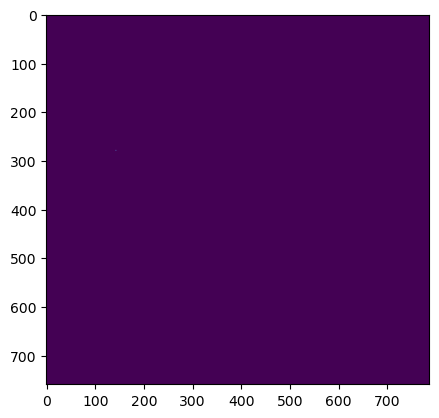

In [22]:
plt.imshow(image[5,1,:,:]*dat["masks"][5]==1735)

In [28]:
a = image[5,1,:,:]
print(a.shape)
b = dat["masks"][5]==1735
print(b.shape)

(759, 786)
(759, 786)


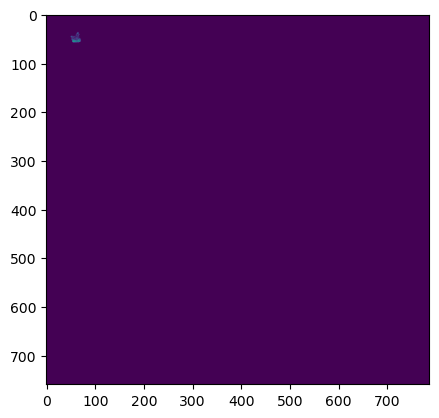

In [33]:
plt.imshow(a*b)